<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [5]:
# Import torch
import torch
import torchvision
from torchvision.transforms import ToTensor

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


2.5.0


## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [6]:
from torchvision import datasets
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None)
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 9.91M/9.91M [00:03<00:00, 3.22MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.21MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.15MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [7]:
len(train_data), len(test_data)

(60000, 10000)

In [12]:
image, label = train_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 5)

In [13]:
train_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

Image shape: torch.Size([1, 28, 28])
Image shape squeezed: torch.Size([28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape squeezed: torch.Size([28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape squeezed: torch.Size([28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape squeezed: torch.Size([28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape squeezed: torch.Size([28, 28])


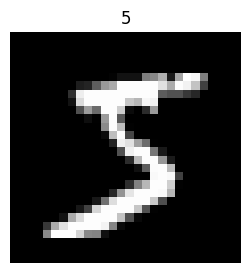

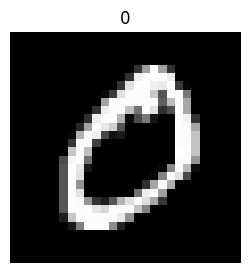

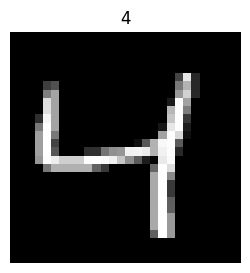

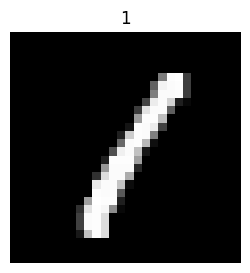

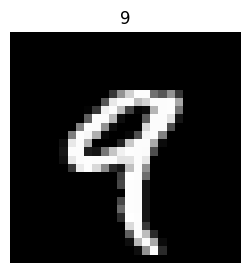

In [14]:
import matplotlib.pyplot as plt
for i in range(5):
    image = train_data[i][0]
    label = train_data[i][1]
    print(f"Image shape: {image.shape}")
    print(f"Image shape squeezed: {image.squeeze().shape}")
    plt.figure(figsize=(3, 3))
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(label)
    plt.axis(False)


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [15]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x16b34b710>,
 <torch.utils.data.dataloader.DataLoader at 0x16b4f3c80>)

In [16]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [19]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [38]:
# Make device agnostic code
def set_device():
    if torch.cuda.is_available():
        device = torch.device("cuda")
    elif torch.backends.mps.is_available() and torch.backends.mps.is_built():
        device = torch.device("mps")
    else:
        device = torch.device("cpu")
    return device

DEVICE = set_device()
print(f"Using device: {DEVICE}")

Using device: mps


In [50]:
from torch import nn
# Create a convolutional neural network

class MNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG model from CNN explainer website.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
            )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # There's a trick to calculate this...
                      out_features=output_shape)
        )
    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape of classifier: {x.shape}")
        return x
    

In [51]:
torch.manual_seed(42)
model_2 = MNISTModelV2(input_shape=1,  # Input shape -> Number of color channel in our image -> For color image it's 3 and black and white 1
                              hidden_units=10,
                             output_shape=len(class_names)).to(DEVICE)

In [52]:
rand_image_tensor = torch.randn(size=(1, 28, 28)).to(DEVICE)
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [53]:
# Pass image through model
model_2(rand_image_tensor.unsqueeze(dim=0))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='mps:0', grad_fn=<LinearBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [54]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [55]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = DEVICE):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device 
    X, y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X)
    
    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()
  
  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [56]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = DEVICE):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0, 0
  
  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass (outputs raw logits)
      test_pred = model(X)

      # 2. Calculuate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels 

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [57]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time."""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [58]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
torch.manual_seed(42)
torch.mps.manual_seed(42)

# Measure time
from timeit import default_timer as Timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------------------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=DEVICE)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=DEVICE)

train_time_end_model_2 = timer()
total_train_time_mode_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=DEVICE)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
------------------
Train loss: 0.33461 | Train acc: 88.83%


 20%|██        | 1/5 [00:12<00:50, 12.68s/it]

Test loss: 0.07385 | Test acc: 97.68%

Epoch: 1
------------------
Train loss: 0.08485 | Train acc: 97.30%


 40%|████      | 2/5 [00:24<00:36, 12.17s/it]

Test loss: 0.06135 | Test acc: 97.98%

Epoch: 2
------------------
Train loss: 0.06686 | Train acc: 97.92%


 60%|██████    | 3/5 [00:36<00:23, 11.91s/it]

Test loss: 0.06047 | Test acc: 98.00%

Epoch: 3
------------------
Train loss: 0.05816 | Train acc: 98.17%


 80%|████████  | 4/5 [00:48<00:11, 11.94s/it]

Test loss: 0.05633 | Test acc: 98.07%

Epoch: 4
------------------
Train loss: 0.05163 | Train acc: 98.41%


100%|██████████| 5/5 [01:00<00:00, 12.14s/it]

Test loss: 0.04398 | Test acc: 98.45%

Train time on mps: 60.705 seconds


In [61]:
# Train the model on CPU
torch.manual_seed(42)
model_cpu = MNISTModelV2(input_shape=1,  # Input shape -> Number of color channel in our image -> For color image it's 3 and black and white 1
                              hidden_units=10,
                             output_shape=len(class_names)).to("cpu")

In [62]:
# Create a loss function and optimizer -> model_cpu
loss_fn_cpu = nn.CrossEntropyLoss()
optimizer_cpu = torch.optim.SGD(params=model_cpu.parameters(), lr=0.1)

In [63]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
torch.manual_seed(42)

# Measure time
train_time_start_model_cpu = timer()

# Train and test model
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------------------")
    train_step(model=model_cpu,
               data_loader=train_dataloader,
               loss_fn=loss_fn_cpu,
               optimizer=optimizer_cpu,
               accuracy_fn=accuracy_fn,
               device="cpu")
    test_step(model=model_cpu,
              data_loader=test_dataloader,
              loss_fn=loss_fn_cpu,
              accuracy_fn=accuracy_fn,
              device="cpu")

train_time_end_model_cpu = timer()
total_train_time_mode_cpu = print_train_time(start=train_time_start_model_cpu,
                                            end=train_time_end_model_cpu,
                                            device="cpu")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
------------------
Train loss: 0.33499 | Train acc: 88.77%


 20%|██        | 1/5 [00:26<01:47, 26.78s/it]

Test loss: 0.07460 | Test acc: 97.66%

Epoch: 1
------------------
Train loss: 0.08130 | Train acc: 97.50%


 40%|████      | 2/5 [00:54<01:22, 27.57s/it]

Test loss: 0.06277 | Test acc: 98.05%

Epoch: 2
------------------
Train loss: 0.06324 | Train acc: 98.03%


 60%|██████    | 3/5 [01:23<00:55, 27.90s/it]

Test loss: 0.05120 | Test acc: 98.24%

Epoch: 3
------------------
Train loss: 0.05423 | Train acc: 98.31%


 80%|████████  | 4/5 [01:49<00:27, 27.46s/it]

Test loss: 0.05915 | Test acc: 98.01%

Epoch: 4
------------------
Train loss: 0.04923 | Train acc: 98.45%


100%|██████████| 5/5 [02:21<00:00, 28.32s/it]

Test loss: 0.04145 | Test acc: 98.49%

Train time on cpu: 141.491 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [64]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = DEVICE):
    pred_probs = []
    model.to(DEVICE)

    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(DEVICE)

            # Forward pass (model outputs raw logits)
            pred_logits = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu()) # Matplotlib works with CPU -> Visualization

    # Stack the pred_probs to turn list into tensor -> Concate everything into a single tensor
    return torch.stack(pred_probs)

In [65]:
import random
random.seed(42)

test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=5):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, '2 - two')

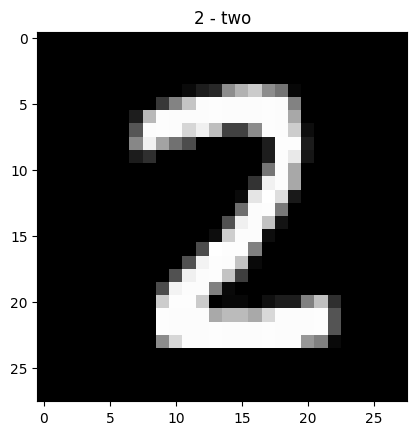

In [66]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [67]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
# View first two prediction probabilities
pred_probs[:2]

tensor([[9.7947e-11, 1.5008e-06, 9.9999e-01, 2.7936e-07, 2.0667e-14, 5.0729e-15,
         2.9837e-13, 2.2086e-08, 1.2497e-05, 1.0433e-11],
        [1.6534e-06, 9.8640e-01, 2.9897e-05, 1.3776e-06, 1.8299e-05, 6.2084e-03,
         3.0371e-03, 2.5408e-05, 4.0058e-03, 2.7418e-04]])

In [68]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 1, 2, 4, 6])

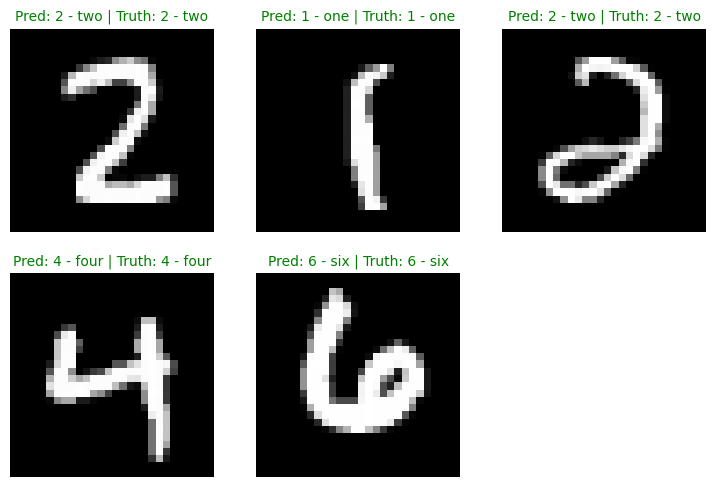

In [72]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form) 
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r") 
  
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [70]:
test_labels

[2, 1, 2, 4, 6]

In [77]:
# Import tqdm.auto 
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()

with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        # Send the data and targets to target device
        X, y = X.to(DEVICE), y.to(DEVICE)
        # Do the forward pass
        y_logits = model_2(X)
        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
        # Put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]


Making predictions...: 100%|██████████| 313/313 [00:01<00:00, 191.75it/s]


tensor([7, 2, 1, 8, 4, 1, 8, 9, 8, 8])

In [78]:
# See if required packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install torchmetrics -U mlxtend 
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1
mlxtend version: 0.23.1


In [79]:
import mlxtend
print(mlxtend.__version__)

0.23.1


In [80]:
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

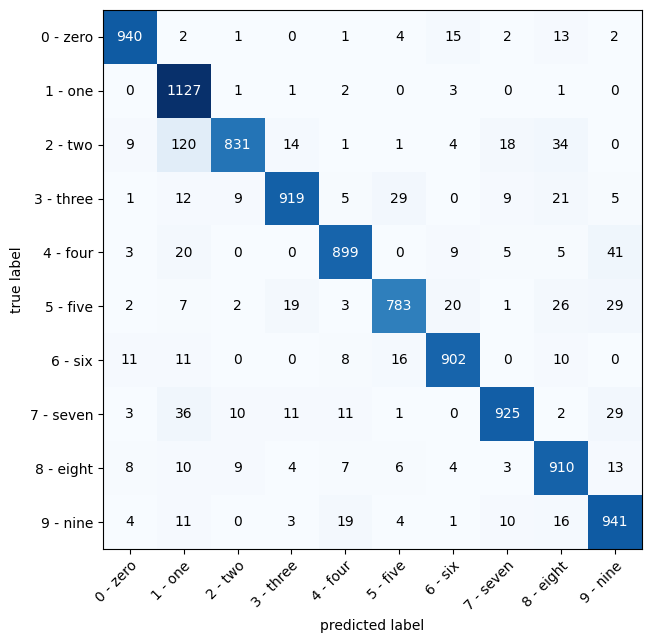

In [81]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)


# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
) 

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [82]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [94]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=3,
                       stride=1,
                       padding=0)
print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 62, 62])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [96]:
# Download FashionMNIST train and test
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # Where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)
len(train_data), len(test_data)

(60000, 10000)

In [97]:
# Get the class names of the Fashion MNIST dataset
fashion_mnist_class_names = train_data.classes
fashion_mnist_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [98]:
# Turn FashionMNIST datasets into dataloaders
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2a0c31b80>,
 <torch.utils.data.dataloader.DataLoader at 0x2a10dc110>)

In [101]:
model = MNISTModelV2(input_shape=1,
                     hidden_units=10,
                     output_shape=len(fashion_mnist_class_names)).to(DEVICE)
model

MNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [108]:
# Setup loss and optimizer 
from torch import nn
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)


In [109]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
torch.manual_seed(42)
torch.mps.manual_seed(42)

# Measure time
train_time_start_model = timer()

# Train and test model
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------------------")
    train_step(model=model,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=DEVICE)
    test_step(model=model,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=DEVICE)

train_time_end_model = timer()
total_train_time_mode = print_train_time(start=train_time_start_model,
                                            end=train_time_end_model,
                                            device=DEVICE)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
------------------
Train loss: 1.20264 | Train acc: 55.70%


 20%|██        | 1/5 [00:14<00:59, 14.99s/it]

Test loss: 0.63687 | Test acc: 76.75%

Epoch: 1
------------------
Train loss: 0.54682 | Train acc: 80.35%


 40%|████      | 2/5 [00:29<00:44, 14.85s/it]

Test loss: 0.50415 | Test acc: 81.26%

Epoch: 2
------------------
Train loss: 0.45763 | Train acc: 83.50%


 60%|██████    | 3/5 [00:44<00:29, 14.68s/it]

Test loss: 0.44781 | Test acc: 83.70%

Epoch: 3
------------------
Train loss: 0.41592 | Train acc: 85.00%


 80%|████████  | 4/5 [00:59<00:15, 15.10s/it]

Test loss: 0.41372 | Test acc: 85.07%

Epoch: 4
------------------
Train loss: 0.38794 | Train acc: 85.98%


100%|██████████| 5/5 [01:16<00:00, 15.35s/it]

Test loss: 0.39579 | Test acc: 85.66%

Train time on mps: 76.765 seconds


In [110]:
# Import tqdm.auto 
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model.eval()

with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        # Send the data and targets to target device
        X, y = X.to(DEVICE), y.to(DEVICE)
        # Do the forward pass
        y_logits = model(X)
        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
        # Put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]


Making predictions...: 100%|██████████| 313/313 [00:01<00:00, 293.74it/s]


tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [119]:
# Get wrong prediction indexes
import numpy as np
wrong_pred_indexes = np.where(y_pred_tensor != test_data.targets)[0]
len(wrong_pred_indexes)

2395

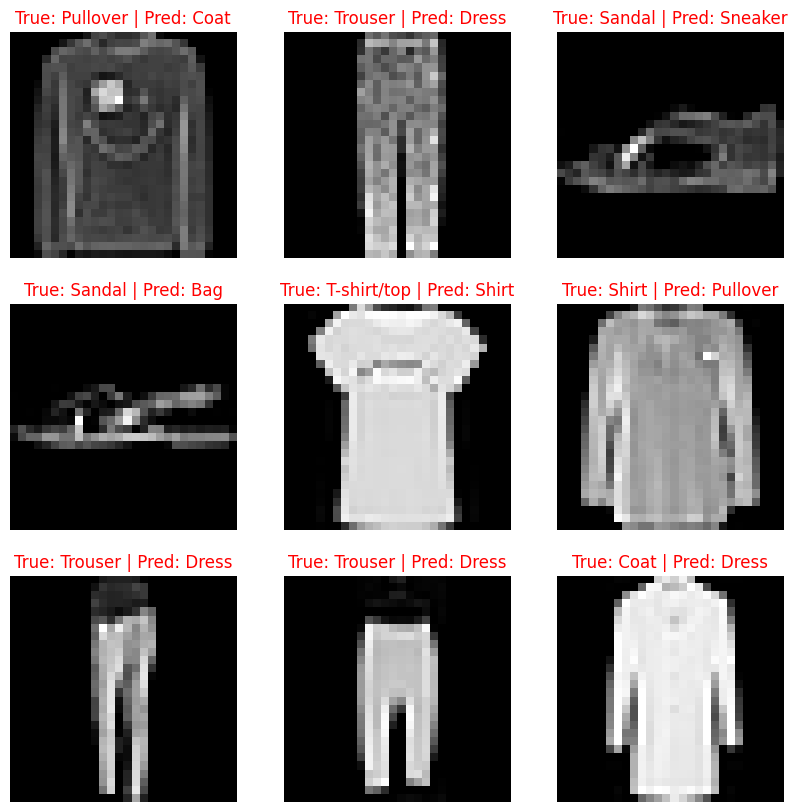

In [120]:
# Select random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
  # Get true and pred labels
  true_label = fashion_mnist_class_names[test_data[idx][1]]
  pred_label = fashion_mnist_class_names[y_pred_tensor[idx]]

  # Plot the wrong prediction with its original label
  plt.subplot(3, 3, i+1)
  plt.imshow(test_data[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False);